# Modelo de **Hodgkin & Huxley**

Referencias:

1. https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model
2. Eugene M. Izhikevich, Dynamical Systems in Neuroscience: The Geometry of Excitability and Bursting, Computational Neuroscience, The MIT Press (2006)
3. https://colab.research.google.com/github/kmkarakaya/ML_tutorials/blob/master/How_to_upload_an_image_to_Colab_.ipynb#scrollTo=KKTpNAGCWLeB

## **Ejercicio 1)** Importando librerías

**a)** Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

**b)** Suba el archivo "libreria" `ode.py` que fabricó en el práctico 4), e impórtelo.

In [101]:
# 1.a)

import numpy as np
import matplotlib.pyplot as plt

In [102]:
# 1.b)

import ode

## **Ejercicio 2)** Modelo de Hodgkin y Huxley

## Teoría

### Las neuronas son capacitores

Según el modelo de Hodgkin y Huxley, a primera vista las neuronas funcionan como capacitores evidenciando una diferencia de potencial eléctrico entre el exterior y el interior debido a las diferentes concentraciones de cargas iónicas que pueden existir entre estas dos regiones.
En el esquema, se utilizan agujas muy finas para inyectar una corriente iónica $i$ al interior de una neurona sumergida en una solución salina conductora.

<img src="https://github.com/jipphysics/redes-neuronales-2022/blob/master/practicos/assets/esquema1.png?raw=true:, width=100" alt="My Image" width=300>

Recordemos que un capacitor sujeto a una diferencia de potencial $v:=v_A-v_B$ adquiere una carga $q=cv$.
La carga crece según $\dot{q}=i$, donde $i$ denota la corriente de carga eléctrica que va desde el exterior hacia el interior.

<img src="https://github.com/jipphysics/redes-neuronales-2022/blob/master/practicos/assets/circuito1.png?raw=true:, width=100" alt="My Image" width=500>

### Las neuronas son capacitores con fugas

Si miramos un poco más en detalle, veremos que la membrana de las neuronas tienen canales por donde pueden circular iones.
Podemos pensar a los canales como agujeritos en la membrana por donde la carga se fuga.
En otras palabras, podemos pensar a los canales como a una resistencia conectada en paralelo al capacitor.

<img src="https://github.com/jipphysics/redes-neuronales-2022/blob/master/practicos/assets/circuito2.png?raw=true:, width=100" alt="My Image" width=500>

La corriente $i_g=g(v_A-v_B)=gv$, donde $i_g$ denota una corriente que va desde el interior hacia el exterior.

### Las neuronas son baterias

Los canales pueden ser selectivos.
Por ejemplo, algunos canales sólo dejan pasar los iones $\mathrm{K}^+$.
Por ende, si inyectamos al interior de la neurona una mezcla de iones $\mathrm{K}^+$ y $\mathrm{Cl}^-$, de manera que la carga total se encuentre equilibrada, los iónes $\mathrm{Cl}^+$ comenzarán a difundir desde el interior hacia el exterior a travéz de los canales selectivos, mientras que los de $\mathrm{Cl}^-$ se quedarán en el interior.
Esto generará un creciente excedente de cargas negativas en el interior y positivas en el exterior, hasta alcanzar un estado de equilibrio en donde la corriente de iones $\mathrm{K}^+$ provocada por la difusión se detiene debido a la diferencia de potencial emergente.

<img src="https://github.com/jipphysics/redes-neuronales-2022/blob/master/practicos/assets/baterias.png?raw=true:, width=100" alt="My Image" width=500>

Este potencial se llama potencial de Nernst o de reversión y se lo incorpora al circuito que modela la neurona como una batería conectada en serie a la resistencia asociada a cada canal

<img src="https://github.com/jipphysics/redes-neuronales-2022/blob/master/practicos/assets/circuito3.png?raw=true:, width=100" alt="My Image" width=500>

Ahora, la corriente $i_g=g(v_A-v_C)=g(v_A-(v_B+e_g))=g(v_A-v_B-e_g)=g(v-e_g)=:g(v-v_g)$, donde en la última iguadad reconocemos la definición del potencial de Nernst $v_g$.

Si la batería se encuentra en sentido inverso

<img src="https://github.com/jipphysics/redes-neuronales-2022/blob/master/practicos/assets/circuito4.png?raw=true:, width=100" alt="My Image" width=500>

entonces $i_g=g(v_A-v_C)=g(v_A-(v_B-e_g))=g(v_A-v_B+e_g)=g(v+e_g)=:g(v-v_g)$, por lo que el potencial de Nernst resulta negativo, $v_g=-e_g$.

### Algunos canales forman reóstatos (resistencias de conductancia variable)

Algunos canales tienen compuertas que se abren o cierran, permitiendo o impidiendo el paso de iones, respectivamente.

<img src="https://github.com/jipphysics/redes-neuronales-2022/blob/master/practicos/assets/compuertas.png?raw=true:, width=100" alt="My Image" width=500>

La conductividad asociada a estos canales, depende de la fracción de compuertas abiertas en cada tipo de canal.
Según el modelo, la conductancia total asociada a los canales de $\mathrm{Na}$ se aproxima por

$$g_{\mathrm{Na}} = \bar{g}_{\mathrm{Na}}p_{\mathrm{Na}}$$

donde $\bar{g}_{\mathrm{Na}}$ es la conductancia de $\mathrm{Na}$ máxima posible y

$$p_{\mathrm{Na}} = m^3h$$

es la fracción de canales de $\mathrm{Na}$ abiertos.
Aquí $m$ y $h$ son la fracciones de compuertas abiertas de activación e inactivación, respectivamente.
Los canales de $\mathrm{Na}$ poseen 3 compuertas de activación y 1 de inactivación, por lo que $m$ tiene un exponente 3 y $h$ un exponente 1.

De manera similar, la conductancia asociada a los canales de $\mathrm{K}$ se aproxima por

$$g_{\mathrm{K}} = \bar{g}_{\mathrm{K}}p_{\mathrm{K}}$$

donde $\bar{g}_{\mathrm{K}}$ es la conductancia de $\mathrm{K}$ máxima posible,

$$p_{\mathrm{K}} = n^4$$

es la fracción de canales de $\mathrm{K}$ abiertos y $n$ es la fracción de compuertas abiertas en este tipo de canales.
Cada canal de $\mathrm{K}$ posee 4 compuertas de tipo $n$, de ahí el exponente 4.

Estas aproximaciones asumen que las compuertas abren o cierran de manera independiente, dependiendo de la diferencia de potencial de membrana existente $v$.
Más precisamente, las fracciones de compuertas abiertas de cada tipo satisfacen

\begin{align}
\dot{n}&=&\alpha_n(v)(1-n)-\beta_n(v) n\\
\dot{m}&=&\alpha_m(v)(1-m)-\beta_m(v) m\\
\dot{h}&=&\alpha_h(v)(1-h)-\beta_h(v) h
\end{align}

donde

\begin{align}
\alpha_h(v)&=&\frac{0.07}{ms\,mV}\,\exp\bigg(-\frac{v}{20\,mV}\bigg)\\
\alpha_m(v)&=&\frac{0.1}{ms\,mV}\frac{25\,mV-v}{\exp\big(\frac{25\,mV-v}{10\,mV}\big)-1}\\
\alpha_n(v)&=&\frac{0.01}{ms\,mV}\frac{10\,mV-v}{\exp\big(\frac{10\,mV-v}{10\,mV}\big)-1}\\
\end{align}

representan las tasas a las cuales las compuertas cerradas de cada tipo abren y

\begin{align}
\beta_h(v)&=&\frac{1}{ms}\frac{1}{\exp\big(\frac{30\,mV-v}{10\,mV}\big)+1}\\
\beta_m(v)&=&\frac{4}{ms}\exp\bigg(-\frac{v}{18\,mV}\bigg)\\
\beta_n(v)&=&\frac{0.125}{ms}\exp\bigg(-\frac{v}{80\,mV}\bigg)
\end{align}

representan las tasas a las cuales las compuertas abiertas de cada tipo cierran, respectivamente.

En resumen, al modelo de neurona de Hodgkin y Huxley se lo puede representar por el circuito

<img src="https://github.com/jipphysics/redes-neuronales-2022/blob/master/practicos/assets/circuito5.png?raw=true:, width=100" alt="My Image" width=500>

en donde reconocemos la existencia de 3 canales iónicos: uno de pérdida (leak) de conductancia constante $g_l$, potencial de Nernst $v_l=e_l$ y por el que fluye una corriente $i_l$, uno de $\mathrm{Na}$ de conductancia variable $g_{\mathrm{Na}}$, potencial de Nernst $v_{\mathrm{Na}}=e_{\mathrm{Na}}$ y por el que fluye una corriente $i_{\mathrm{Na}}$, y uno de $\mathrm{K}$ de conductancia $g_{\mathrm{K}}$, potencial de Nernst $v_{\mathrm{K}}=-e_{\mathrm{K}}$ y por el que fluye una corriente $i_{\mathrm{K}}$.

Aplicando la ley de Kirchoff para corrientes, vemos que

$$i=i_{\mathrm{Na}}+i_{\mathrm{K}}+i_l+i_c$$

Es decir, la corriente $i$ inyectada al interior de la neurona se divide en dos partes.
Por un lado, en la corriente $i_m=i_{\mathrm{Na}}+i_{\mathrm{K}}+i_l$ que fluye a travéz de los canales en la membrana,
y por otro lado, en la corriente $i_c$ que carga el capacitor.

Remplazando, obtenemos una ODE para el potencial de membrana

\begin{align}
i_c&=&i-i_{\mathrm{Na}}+i_{\mathrm{K}}+i_l\\
c\dot{v}&=&i-g_{\mathrm{Na}}(v-v_{\mathrm{Na}})-g_{\mathrm{K}}(v-v_{\mathrm{K}})-g_{l}(v-v_{l})\\
\dot{v}&=&c^{-1}(i-\bar{g}_{\mathrm{Na}}m^3h(v-v_{\mathrm{Na}})-\bar{g}_{\mathrm{K}}n^4(v-v_{\mathrm{K}})-g_{l}(v-v_{l}))
\end{align}

La última línea de la anterior ecuación, junto con las ODEs anteriormente mencionadas para $n$, $m$ y $h$, determinan el sistema de ODEs del modelo de Hodgkin y Huxley.

### Comportamiento cualitativo

Durante el proceso de disparo, diferentes compuertas se abren y cierran a diferentes tiempos.
El siguiente esquema resume el proceso en 4 etapas

<img src="https://github.com/jipphysics/redes-neuronales-2022/blob/master/practicos/assets/channels.png?raw=true:, width=100" alt="My Image" width=300>

Estimaciones de los tiempos carácterísticos y valores de equilibrio del comportamiento de las compuertas observado en las diferentes etapas se pueden obtener de reescribir las ODEs para $n$, $m$ y $h$ de la forma

\begin{align}
\dot{n}&=&\tau_n^{-1}(v)(n_{\infty}(v)-n)\\
\dot{m}&=&\tau_m^{-1}(v)(m_{\infty}(v)-m)\\
\dot{h}&=&\tau_h^{-1}(v)(h_{\infty}(v)-h)
\end{align}

donde

\begin{align}
\tau_n(v)&=&(\alpha_n(v)+\beta_n(v))^{-1}\\
\tau_m(v)&=&(\alpha_m(v)+\beta_m(v))^{-1}\\
\tau_h(v)&=&(\alpha_h(v)+\beta_h(v))^{-1}
\end{align}

y

\begin{align}
n_{\infty}(v)&=&\tau_n(v)\alpha_n(v)\\
m_{\infty}(v)&=&\tau_m(v)\alpha_m(v)\\
h_{\infty}(v)&=&\tau_h(v)\alpha_h(v)
\end{align}

Finalmente, listamos los valores de los parámetros del modelo (ver libro de Izhikevich)

* $c=1\,\mu F/cm^2$ : capacitancia de membrana
* $\bar{g}_{\mathrm{Na}}=120\,mS/cm^2$ : conductancia máxima de $\mathrm{Na}$
* $\bar{g}_{\mathrm{K}}=36\,mS/cm^2$ : conductancia máxima de $\mathrm{K}$
* $g_l=0.3\,mS/cm^2$ : conductancia máxima de perdida
* $v_{\mathrm{Na}}=120\,mV$ : potencial de reversión de la corriente de $\mathrm{Na}$
* $v_{\mathrm{K}}=-12\,mV$ : potencial de reversión de la corriente de $\mathrm{K}$
* $v_l=10.6\,mV$ : potencial de reversión de la corriente de perdida
* $i(t)\sim 10\,\mu A/cm^2$ : corriente de entrada al tiempo $t$
* $t \sim 5\,ms$ : tiempo

Aclaración, los valores de los potenciales de Nernst se toman en referencia al potencial de equilibrio definido en $v\approx 0\, mV$.

## Ejercicio 2) implementación

**1)** Usando la sección de teoría y las referencias, implemente el modelo de Hodgkin y Huxley el integrador numérico de ODEs tipo Runge-Kutta de orden 4 del práctico 4.

**2)** Grafique los valores de equilibrio de las distintas fracciones de canales activados $n_{\infty}$, $m_{\infty}$ e inactivados $h_{\infty}$, en función de la diferencia de potencial de membrana $v$.

**3)** Grafique los tiempos característicos de activación $\tau_m$, $\tau_n$ e inactivación $\tau_h$ asociados a los distintos tipos de canales, en función de la diferencia de potencial de membrana $v$.

In [103]:
# 2.1)

# Tasas de apertura (tensión en mV)

def alpha_h(v):
    return 0.07*np.exp(-v/20.0)
def alpha_m(v):
    return 0.1*(25.0-v)/(np.exp((25.0-v)/10.0)-1.0)
def alpha_n(v):
    return 0.01*(10.0-v)/(np.exp((10.0-v)/10.0)-1.0)

# Tasas de cierre (tensión en mV)

def beta_h(v):
    return 1.0/(np.exp((30.0-v)/10.0)+1.0)
def beta_m(v):
    return 4.0*np.exp(-v/18.0)
def beta_n(v):
    return 0.125*np.exp(-v/80.0)

# Tiempos característicos 

def tau_n(v):
    return 1.0/(alpha_n(v)+beta_n(v))
def tau_m(v):
    return 1.0/(alpha_m(v)+beta_m(v))
def tau_h(v):
    return 1.0/(alpha_h(v)+beta_h(v))

# Valores de equilibrio 

def n_inf(v):
    return tau_n(v)*alpha_n(v)
def m_inf(v):
    return tau_m(v)*alpha_m(v)
def h_inf(v):
    return tau_h(v)*alpha_h(v)

In [104]:
# Implementación de la ODE

def ina(x, p):
    v = x[0]
    m = x[2]
    h = x[3]
    gna = p[1]
    vna = p[4]
    return gna*(v-vna)*m**3*h

def ik(x, p):
    v = x[0]
    n = x[1]
    gk = p[2]
    vk = p[5]
    return (v-vk)*gk*n**4

def il(x, p):
    v = x[0]
    gl = p[3]
    vl = p[6]
    return gl*(v-vl)

def f(x, t, p):
    '''
    x[0] = v(t)     : potencial de membrana
    x[1] = n(t)     : activacion de K
    x[2] = m(t)     : activacion de Na
    x[3] = h(t)     : inactivacion de Na
    t               : tiempo (ms)
    p[0] = c        : capacitancia de membrana (uF/cm^2)
    p[1] = gna      : conductancia máxima de Na (mS/cm^2)
    p[2] = gk       : conductancia máxima de pérdida (mS/cm^2)
    p[3] = gl       : conductancia máxima de pérdida (mS/cm^2)
    p[4] = vna      : potencial de Nernst de K (mV)
    p[5] = vk       : potencial de Nernst Na (mV)
    p[6] = vl       : potencial de Nernst de la corriente de pérdida (mV)
    p[7] = t->i(t)  : función corriente de entrada (uA/cm^2)
    Retorna (dv/dt, dn/dt, dm/dt, dh/dt)  
    '''

    v = x[0]
    n = x[1]
    m = x[2]
    h = x[3]
    c = p[0]
    i = p[7]

    return np.array([
        (i(t)-ina(x, p)-ik(x, p)-il(x, p))/c,   # ecuación para dv/dt
        alpha_n(v)*(1.0-n)-beta_n(v)*n,         # ecuación para dn/dt
        alpha_m(v)*(1.0-m)-beta_m(v)*m,         # ecuación para dm/dt
        alpha_h(v)*(1.0-h)-beta_h(v)*h          # ecuación para dh/dt      
    ])

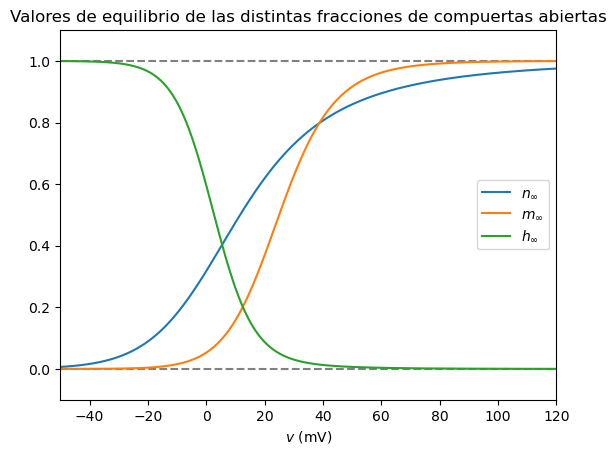

In [105]:
# 2.2)

plt.xlabel('$v$ (mV)')
plt.xlim(-50, 120)
plt.ylim(-0.1, 1.1)
v = np.linspace(-50, 120, 1000)
plt.plot(v, 0*v, label='', linestyle='--', color='gray')
plt.plot(v, 0*v+1, label='', linestyle='--', color='gray')
plt.plot(v, np.vectorize(n_inf)(v), label='$n_{\infty}$', linestyle='-')
plt.plot(v, np.vectorize(m_inf)(v), label='$m_{\infty}$', linestyle='-')
plt.plot(v, np.vectorize(h_inf)(v), label='$h_{\infty}$', linestyle='-')
plt.title('Valores de equilibrio de las distintas fracciones de compuertas abiertas')
plt.legend()
plt.savefig('valores_de_equilibrio.png', bbox_inches='tight')
plt.show()

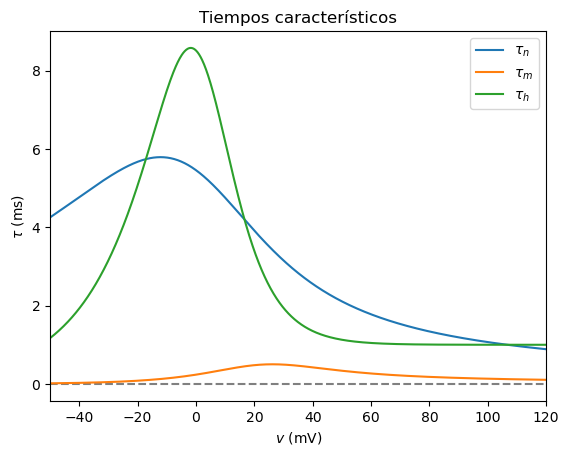

In [106]:
# 2.3)

plt.xlabel('$v$ (mV)')
plt.ylabel('$\\tau$ (ms)')
plt.xlim(-50, 120)
v = np.linspace(-50, 120, 1000)

plt.plot(v, 0*v, label='', linestyle='--', color='gray')
plt.plot(v, np.vectorize(tau_n)(v), label='$\\tau_n$', linestyle='-')
plt.plot(v, np.vectorize(tau_m)(v), label='$\\tau_m$', linestyle='-')
plt.plot(v, np.vectorize(tau_h)(v), label='$\\tau_h$', linestyle='-')
plt.title('Tiempos característicos')
plt.legend()
plt.savefig('tiempos_caracteristicos.png', bbox_inches='tight')
plt.show()

## Ejercicio 3) valores de equilibrio

**1)** Integre el sistema de ODEs del modelo de Hodgkin y Huxley sujeto a una corriente total $i(t)=0$ para todo $t$. Use la condición inicial $v_0=0mV$, $n_0=m_0=h_0=0$ y $t_0=0ms$. Integre hasta el tiempo final $t_f=500ms$ usando un paso temporal $dt=0.01ms$.

**2)** Grafique el potencial de membrana en función del tiempo, i.e. grafique $v(t)$ vs $t$ en el rango calculado.

**3)** Grafique las diferentes corrientes de iones cruzando la membrana en función del tiempo, i.e. grafique  la corriente de iones de sodio $i_{Na}(t)$, la corriente de iones de potasio $i_K(t)$ y la corriente de pérdida $i_l(t)$ vs $t$ en el rango calculado.

**4)** Grafique las fracción de canales activados e inactivados de cada tipo en función del tiempo, i.e. grafique $n(t)$ (fracción de canales de potasio $K$ activos), $m(t)$ (fracción de canales de sodio $Na$ activos) y $h(t)$ (fracción de canales de sodio $Na$ inactivos) vs $t$ en el rango calculado.

**5)** Almacene los valores de equilibrio a corriente nula de las variables dinámicas usando los valores de las mismas obtenidos a tiempos largos. Es decir, almacene los valores $v^* \approx v(t_f)$, $n^* \approx n(t_f)$, $m^* \approx m(t_f)$ y $h^* \approx h(t_f)$, para ser utilizado como condiciones iniciales en futuras integraciones de las ODEs del modelo de Hodgkin y Huxley.

In [107]:
# 3.1)

# Parámetros
c=1.0
gna = 120.0
gk = 36.0
gl = 0.3
vna = 120.0
vk = -12.0
vl = 10.6

# Condiciones iniciales premilinares
v0 = 0.0
n0 = 0.0
m0 = 0.0
h0 = 0.0
x0 = np.array([v0, h0, m0, n0])

In [108]:
tini = 0    # mS
tend = 500  # mS
h = 0.01    # mS
k = int((tend-tini)/h)
p = [c, gna, gk, gl, vna, vk, vl, lambda t:0]
x0 = np.array([v0, h0, m0, n0])
t, x = ode.integrador_ode(ode.rk4, f, x0, tini, tend, k, p)

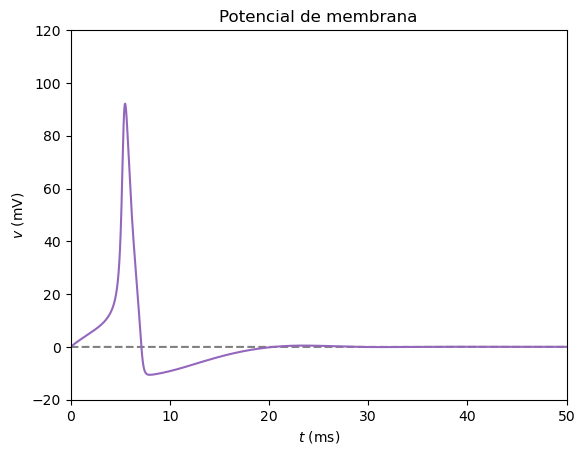

In [109]:
# 3.2)

plt.xlabel('$t$ (ms)')
plt.ylabel('$v$ (mV)')
plt.xlim(0, 50)
plt.ylim(-20, 120)
plt.plot(t, 0*t, linestyle='--', color='gray')
plt.plot(t, x[0], color='#9467bd')
plt.title('Potencial de membrana')
plt.savefig('potencial_nula.png', bbox_inches='tight')
plt.show()

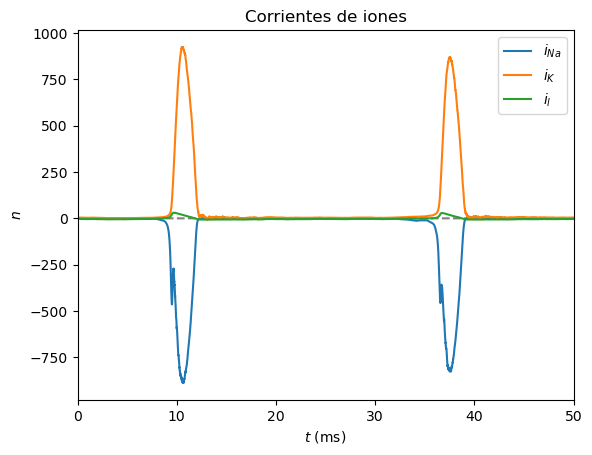

In [135]:
# 3.3)

plt.xlabel('$t$ (ms)')
plt.ylabel('$n$')
plt.xlim(0, 50)
#plt.ylim(-30, 30)
plt.plot(t, 0*t, linestyle='--', color='gray')
plt.plot(t, [ina(x[:, j], p) for j in range(len(t))], label='$i_{Na}$')
plt.plot(t, [ik(x[:, j], p) for j in range(len(t))], label='$i_{K}$')
plt.plot(t, [il(x[:, j], p) for j in range(len(t))], label='$i_{l}$')
plt.title('Corrientes de iones')
plt.legend()
plt.savefig('corrientes_de_iones.png', bbox_inches='tight')
plt.show()

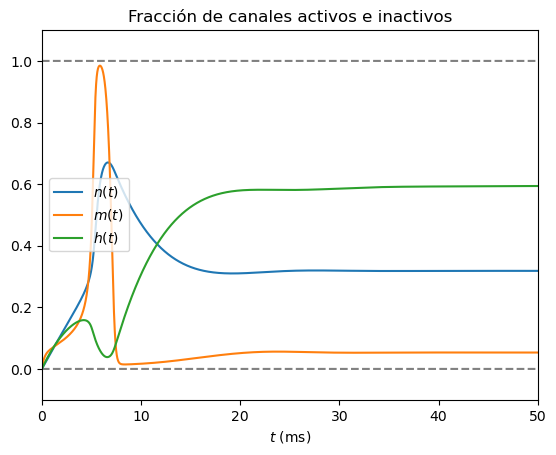

In [111]:
# 3.4)

plt.xlabel('$t$ (ms)')
plt.xlim(0, 50)
plt.ylim(-0.1, 1.1)
plt.plot(t, 0*t, linestyle='--', color='gray')
plt.plot(t, 0*t+1, linestyle='--', color='gray')
plt.plot(t, x[1], label='$n(t)$')
plt.plot(t, x[2], label='$m(t)$')
plt.plot(t, x[3], label='$h(t)$')
plt.title('Fracción de canales activos e inactivos')
plt.legend()
plt.savefig('canales_nula.png', bbox_inches='tight')
plt.show()

In [112]:
# 3.5)

x0 = x[:, -1]   # Valores de equilibrio para usarlos como condición inicial

## Ejercicio 4) estímulo débil y estímulo fuerte

**1)** Implemente una función de corriente de entrada o membrana dada por:

$$
i(t) = \left\{
\begin{array}{ll}
10 \mu A/cm^2, & t\in [2ms,2.5ms] \\
30 \mu A/cm^2, & t\in [10ms,10.5ms] \\
0 \mu A/cm^2, & c.c. \\
\end{array}
\right.
$$

Aquí, $c.c.$ indica *en caso contrario*. Esta corriente representa un estímulo débil seguido de uno fuerte. Grafíque la corriente $i(t)$ vs $t$ en el rango $t\in[0ms,20ms]$.

**2)** Integre nuevamente el sistema de ODEs del modelo de Hodgkin y Huxley sujeto a la corriente del inciso anterior. Use como condición inicial a tiempo $t=0$ los valores de equilibrio estimados en el ejercicio anterior. Integre hasta el tiempo final $t_f=500ms$ usando un paso temporal $dt=0.01ms$.

**3)** Grafique el potencial de membrana en función del tiempo, i.e. $v(t)$ vs $t$ en el rango calculado.

**4)** Grafique la evolución de las fraciones de canales activos e inactivos, $n(t)$, $m(t)$ y $h(t)$ vs $t$.

**5)** Discuta como responde la neurona en el primer impulso a $t=2ms$. Luego, como responde al segundo impulso a $t=10ms$. Existe una diferencia? Explique.


In [113]:
# 4.1)

def i(t):
    if t >= 2.0 and t <= 2.5:
        return 10.0
    elif t >= 10.0 and t <= 10.5:
        return 30.0
    else:
        return 0.0

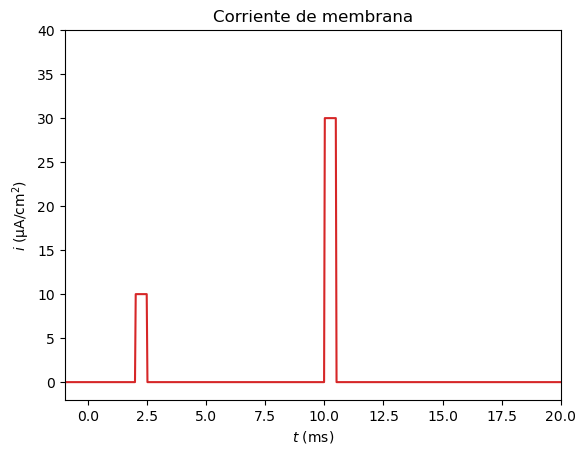

In [114]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$i$ $\mathrm{(\mu A/cm^2)}$')
plt.xlim(-1, 20)
plt.ylim(-2, 40)
t = np.linspace(-1, 30, 1000)
plt.plot(t, np.vectorize(i)(t), color='#d62728')
plt.title('Corriente de membrana')
plt.savefig('corriente_estimulos.png', bbox_inches='tight')
plt.show()

In [115]:
# 4.2)

tini = 0    # mS
tend = 20   # mS
h = 0.01    # mS
k = int((tend-tini)/h)
p = [c, gna, gk, gl, vna, vk, vl, i]
t, x = ode.integrador_ode(ode.rk4, f, x0, tini, tend, k, p)

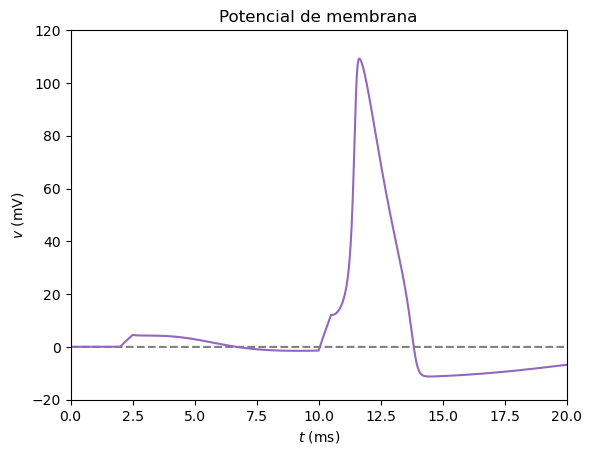

In [116]:
# 4.3)

plt.xlabel('$t$ (ms)')
plt.ylabel('$v$ (mV)')
plt.xlim(0, 20)
plt.ylim(-20, 120)
plt.plot(t, 0*t, linestyle='--', color='gray')
plt.plot(t, x[0], color='#9467bd')
plt.title('Potencial de membrana')
plt.savefig('potencial_estimulos.png', bbox_inches='tight')
plt.show()

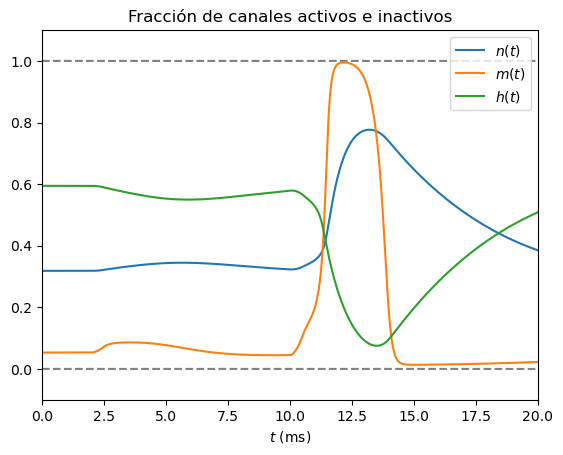

In [117]:
# 3.4)

plt.xlabel('$t$ (ms)')
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.plot(t, 0*t, linestyle='--', color='gray')
plt.plot(t, 0*t+1, linestyle='--', color='gray')
plt.plot(t, x[1], label='$n(t)$')
plt.plot(t, x[2], label='$m(t)$')
plt.plot(t, x[3], label='$h(t)$')
plt.title('Fracción de canales activos e inactivos')
plt.legend()
plt.savefig('canales_estimulos.png', bbox_inches='tight')
plt.show()

## Ejercicio 5) ráfaga

**1)** Implemente la corriente de membrana

$$
i(t) = \left\{
\begin{array}{ll}
10 \mu A/cm^2, & t\in [5ms,\infty ms) \\
0 \mu A/cm^2, & c.c. \\
\end{array}
\right.
$$

Esta corriente representa un estímulo constante.

**2)** Integre nuevamente las ODEs para $t\in[0ms,100ms]$, usando como condición incial los valores de equilibrio derivados en el inciso **6)** y un paso de integración $dt=0.01$.

**3)** Grafique nuevamente el potencial de membrana en el rango de tiempos calculado.

**4)** Grafique nuevamente fracciones de canales activos e inactivos vs el tiempo.

**5)** Discuta lo que observa y explique.

In [118]:
# 5.1)

def i(t):
    if t >= 5.0:
        return 10.0
    else:
        return 0.0

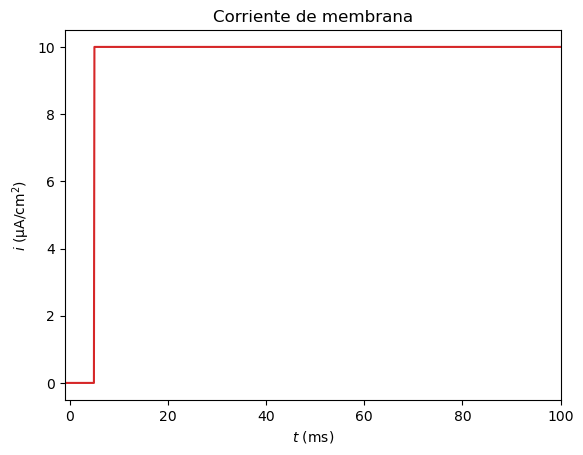

In [119]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$i$ $\mathrm{(\mu A/cm^2)}$')
plt.xlim(-1, 100)
t = np.linspace(-1, 100, 1000)
plt.plot(t, np.vectorize(i)(t), color='#d62728')
plt.title('Corriente de membrana')
plt.savefig('corriente_constante.png', bbox_inches='tight')
plt.show()

In [120]:
# 5.2)

tini = 0    # mS
tend = 100   # mS
h = 0.01    # mS
k = int((tend-tini)/h)
p = [c, gna, gk, gl, vna, vk, vl, i]
t, x = ode.integrador_ode(ode.rk4, f, x0, tini, tend, k, p)

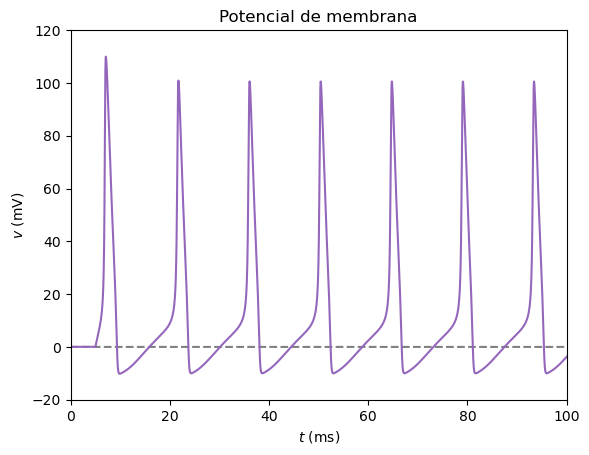

In [121]:
# 5.3)

plt.xlabel('$t$ (ms)')
plt.ylabel('$v$ (mV)')
plt.xlim(0, 100)
plt.ylim(-20, 120)
plt.plot(t, 0*t, linestyle='--', color='gray')
plt.plot(t, x[0], color='#9467bd')
plt.title('Potencial de membrana')
plt.savefig('potencial_constante.png', bbox_inches='tight')
plt.show()

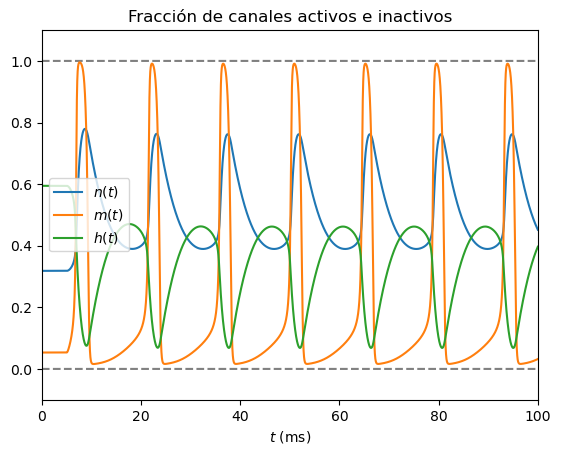

In [122]:
# 5.4)

plt.xlabel('$t$ (ms)')
plt.xlim(0, 100)
plt.ylim(-0.1, 1.1)
plt.plot(t, 0*t, linestyle='--', color='gray')
plt.plot(t, 0*t+1, linestyle='--', color='gray')
plt.plot(t, x[1], label='$n(t)$')
plt.plot(t, x[2], label='$m(t)$')
plt.plot(t, x[3], label='$h(t)$')
plt.title('Fracción de canales activos e inactivos')
plt.legend()
plt.savefig('canales_constante.png', bbox_inches='tight')
plt.show()

## Ejercicio 6) período refractario

**1)** Implemente la corriente de membrana

$$
i(t) = \left\{
\begin{array}{ll}
10 \mu A/cm^2, & t\in [10ms\, k,10 ms\, k + 2ms], k \in \{1,2,3,4,5,...\}\\
0 \mu A/cm^2, & c.c. \\
\end{array}
\right.
$$

**2)** Integre nuevamente las ODEs para $t\in[0ms,100ms]$, usando la corriente del inciso **12)**, la condición incial los valores de equilibrio derivados en el inciso **6)** y un paso de integración $dt=0.01$.

**3)** Grafique nuevamente el potencial de membrana en el rango de tiempos calculado.

**4)** Grafique nuevamente fracciones de canales activos e inactivos vs el tiempo.

**5)** Discuta lo que observa y explique.

In [123]:
# 6.1)

def i(t):
    for n in range(1, 10):
        if t >= 10*n and t <= 10*n+2:
            return 10.0
    return 0.0

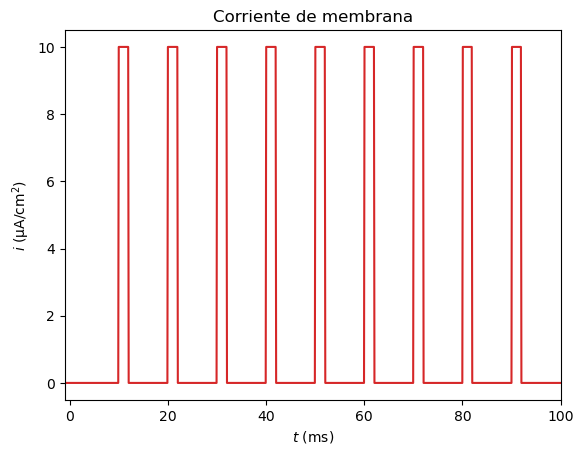

In [124]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$i$ $\mathrm{(\mu A/cm^2)}$')
plt.xlim(-1, 100)
t = np.linspace(-1, 100, 1000)
plt.plot(t, np.vectorize(i)(t), color='#d62728')
plt.title('Corriente de membrana')
plt.savefig('corriente_pulsos.png', bbox_inches='tight')
plt.show()

In [125]:
# 6.2)

tini = 0    # mS
tend = 100   # mS
h = 0.01    # mS
k = int((tend-tini)/h)
p = [c, gna, gk, gl, vna, vk, vl, i]
t, x = ode.integrador_ode(ode.rk4, f, x0, tini, tend, k, p)

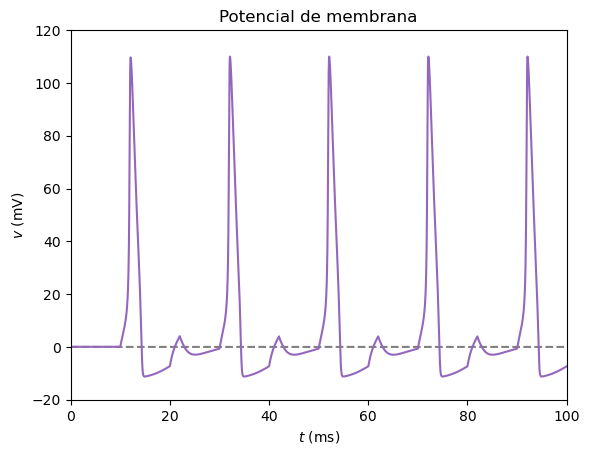

In [126]:
# 6.3)

plt.xlabel('$t$ (ms)')
plt.ylabel('$v$ (mV)')
plt.xlim(0, 100)
plt.ylim(-20, 120)
plt.plot(t, 0*t, linestyle='--', color='gray')
plt.plot(t, x[0], color='#9467bd')
plt.title('Potencial de membrana')
plt.savefig('potencial_pulsos.png', bbox_inches='tight')
plt.show()

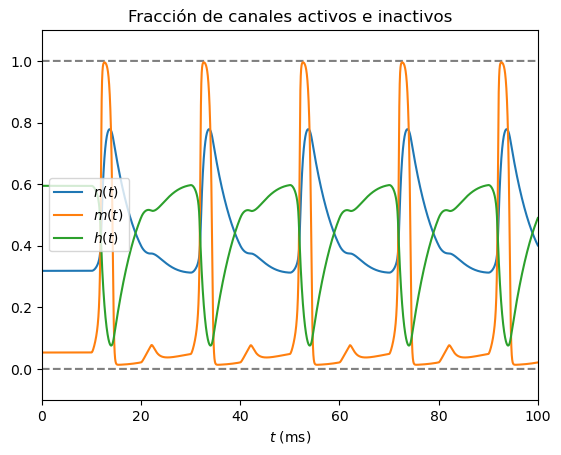

In [127]:
# 6.4)

plt.xlabel('$t$ (ms)')
plt.xlim(0, 100)
plt.ylim(-0.1, 1.1)
plt.plot(t, 0*t, linestyle='--', color='gray')
plt.plot(t, 0*t+1, linestyle='--', color='gray')
plt.plot(t, x[1], label='$n(t)$')
plt.plot(t, x[2], label='$m(t)$')
plt.plot(t, x[3], label='$h(t)$')
plt.title('Fracción de canales activos e inactivos')
plt.legend()
plt.savefig('canales_pulsos.png', bbox_inches='tight')
plt.show()

## Ejercicio 7) exitaciones espontáneas en respuesta al ruido

**1)** Implemente una corriente estocástica que retorne un valor $i(t)\sim i_0 N(0,1)$ (i.e. $i_0$ por un valor aleatorio obtenido de una distribución normal de media 0 y varianza 1) para cada valor de $t$ en el que sea evaluada.

**2)** Integre nuevamente las ODEs para $t\in[0ms,500ms]$, usando la corriente del inciso **22)** para $i_0=50\mu A$, la condición incial los valores de equilibrio derivados en el inciso **6)** y un paso de integración $dt=0.01$.

**3)** Grafique nuevamente el potencial de membrana en el rango de tiempos calculado.

**4)** Grafique nuevamente fracciones de canales activos e inactivos vs el tiempo.

**5)** Observa picos de activación cada tanto? Aparecen con regularidad? Estime con que frecuencia observa los picos.

In [128]:
# 7.1)

i0 = 50

def i(t):
    return i0*np.random.normal()

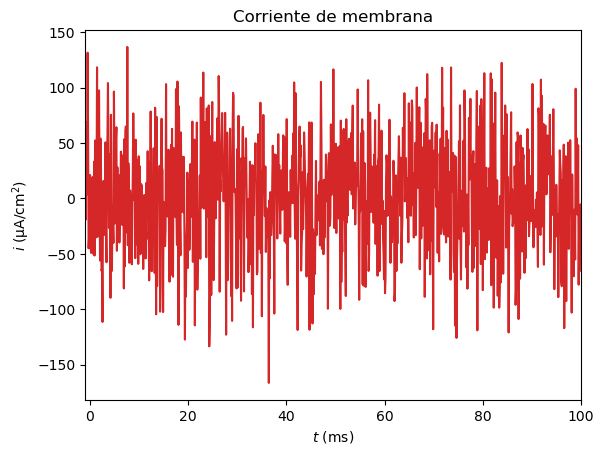

In [129]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$i$ $\mathrm{(\mu A/cm^2)}$')
plt.xlim(-1, 100)
t = np.linspace(-1, 100, 1000)
plt.plot(t, np.vectorize(i)(t), color='#d62728')
plt.title('Corriente de membrana')
plt.savefig('corriente_ruido.png', bbox_inches='tight')
plt.show()

In [130]:
# 7.2)

tini = 0    # mS
tend = 500   # mS
h = 0.01    # mS
k = int((tend-tini)/h)
p = [c, gna, gk, gl, vna, vk, vl, i]
t, x = ode.integrador_ode(ode.rk4, f, x0, tini, tend, k, p)

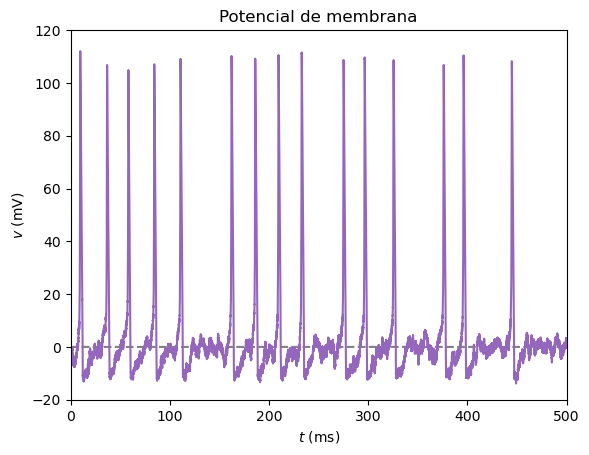

In [131]:
# 7.3)

plt.xlabel('$t$ (ms)')
plt.ylabel('$v$ (mV)')
plt.xlim(0, 500)
plt.ylim(-20, 120)
plt.plot(t, 0*t, linestyle='--', color='gray')
plt.plot(t, x[0], color='#9467bd')
plt.title('Potencial de membrana')
plt.savefig('potencial_ruido.png', bbox_inches='tight')
plt.show()

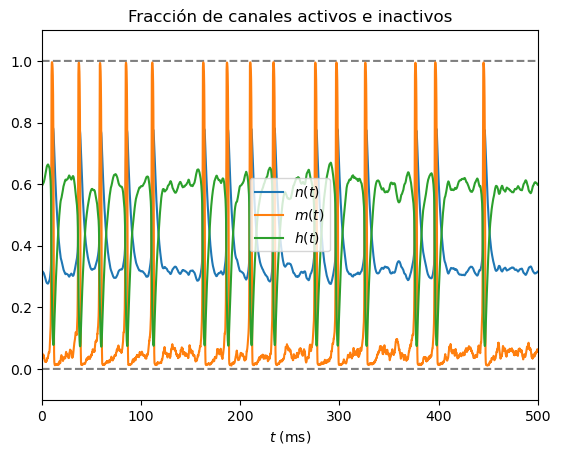

In [132]:
# 7.4)

plt.xlabel('$t$ (ms)')
plt.xlim(0, 500)
plt.ylim(-0.1, 1.1)
plt.plot(t, 0*t, linestyle='--', color='gray')
plt.plot(t, 0*t+1, linestyle='--', color='gray')
plt.plot(t, x[1], label='$n(t)$')
plt.plot(t, x[2], label='$m(t)$')
plt.plot(t, x[3], label='$h(t)$')
plt.title('Fracción de canales activos e inactivos')
plt.legend()
plt.savefig('canales_ruido.png', bbox_inches='tight')
plt.show()